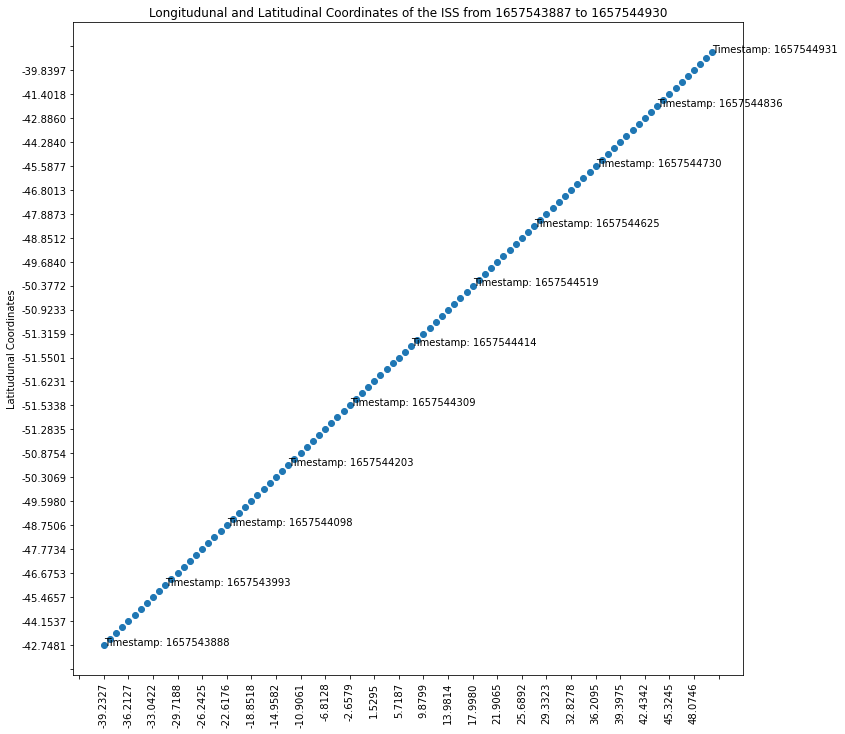

In [111]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

def ping_iss():
    iss_data = requests.get('http://api.open-notify.org/iss-now.json')
    iss_data = iss_data.json()

    longitude = iss_data["iss_position"]["longitude"]
    latitude = iss_data["iss_position"]["latitude"]
    timestamp = iss_data["timestamp"]
    
    return [timestamp,longitude, latitude]

data = list()
timestamps = list()
number_of_datapoints = 100;

for x in range(number_of_datapoints):
    if x == 0:
        startTime = ping_iss()[0]
    elif x == number_of_datapoints-1:
        endTime = ping_iss()[0]
    data.append(ping_iss())
    time.sleep(10)
    
dataframe = pd.DataFrame(data, columns = ["Timestamp", "Longitude", "Latitude"])

fig, ax = plt.subplots( figsize=(12,12))

ax.scatter(dataframe["Longitude"], dataframe["Latitude"])
ax.yaxis.set_major_locator(plt.MaxNLocator(30))
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_ylabel("Longitudunal Coordinates")
ax.set_ylabel("Latitudunal Coordinates")
plt.xticks(rotation=90)
ax.set_title(f"Longitudunal and Latitudinal Coordinates of the ISS from {startTime} to {endTime}")

for i in range(0,len(dataframe)+1,10):
    if i == len(dataframe):
        i = i - 1
    ax.annotate(f'Timestamp: {dataframe["Timestamp"][i]}',(dataframe["Longitude"][i], dataframe["Latitude"][i]))
    i += 10;

In [112]:
dataframe

Timestamp Longitude  Latitude
0   1657543888  -39.2327  -42.7481
1   1657543898  -38.4917  -43.1078
2   1657543909  -37.7414  -43.4620
3   1657543919  -36.9818  -43.8107
4   1657543930  -36.2127  -44.1537
..         ...       ...       ...
95  1657544888   47.3999  -40.2371
96  1657544899   48.0746  -39.8397
97  1657544909   48.7410  -39.4379
98  1657544920   49.3993  -39.0318
99  1657544931   50.0804  -38.6018

[100 rows x 3 columns]